In [12]:
import pandas as pd

#Učitavanje CSV datoteke
df = pd.read_csv("StudentsPerformance.csv")

#Prvih 5 redaka
print(df.head())

#Broj redaka i stupaca
print("Broj redaka i stupaca:", df.shape)

#Tipovi varijabli
print(df.dtypes)

#Provjera nedostajućih vrijednosti
print(df.isnull().sum())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Broj redaka i stupaca: (1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch       

In [13]:
# Odabir varijabli
numeric_cols = ['math score', 'reading score', 'writing score']

desc_stats = df[numeric_cols].describe()
print(desc_stats)

for col in numeric_cols:
    print(f"{col}:")
    print(f"  Mod = {df[col].mode()[0]}")
    print(f"  Medijan = {df[col].median()}")
    print(f"  Kvartili = \n{df[col].quantile([0.25, 0.5, 0.75])}\n")


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
math score:
  Mod = 65
  Medijan = 66.0
  Kvartili = 
0.25    57.0
0.50    66.0
0.75    77.0
Name: math score, dtype: float64

reading score:
  Mod = 72
  Medijan = 70.0
  Kvartili = 
0.25    59.0
0.50    70.0
0.75    79.0
Name: reading score, dtype: float64

writing score:
  Mod = 74
  Medijan = 69.0
  Kvartili = 
0.25    57.75
0.50    69.00
0.75    79.00
Name: writing score, dtype: float64



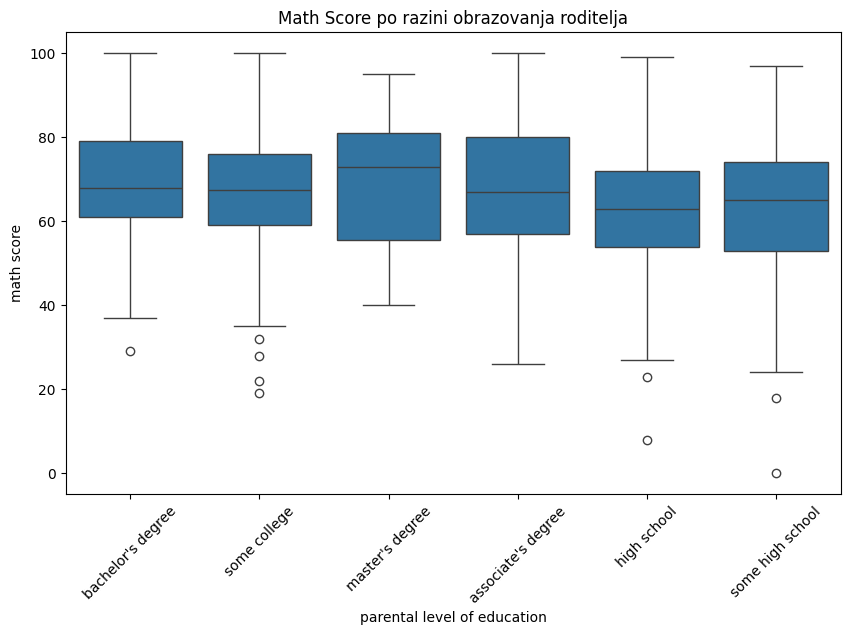

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Math Score po razini obrazovanja roditelja')
plt.xticks(rotation=45)
plt.show()


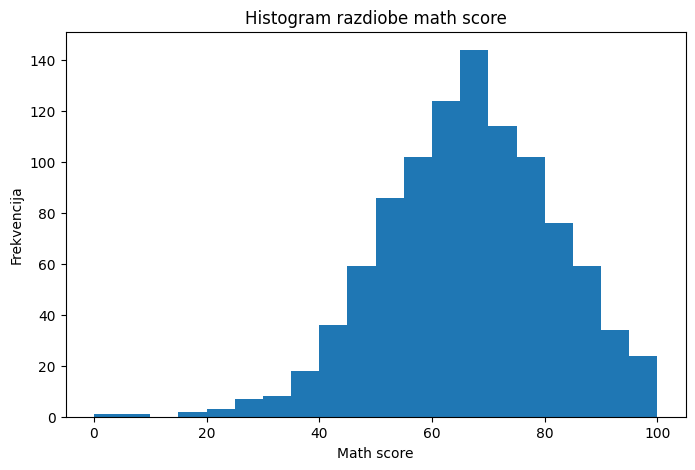

In [36]:
plt.figure(figsize=(8,5))
plt.hist(df['math score'], bins=20)
plt.title('Histogram razdiobe math score')
plt.xlabel('Math score')
plt.ylabel('Frekvencija')
plt.show()



In [38]:
groups = [
    df[df['parental level of education'] == level]['math score']
    for level in df['parental level of education'].unique()
]


from scipy.stats import shapiro

for i, group in enumerate(groups):
    stat, p = shapiro(group)
    print(f"Grupa {i+1}: p-vrijednost = {p}")

from scipy.stats import levene

stat, p = levene(*groups)
print(f"Levene test p-vrijednost = {p}")



Grupa 1: p-vrijednost = 0.6043462753295898
Grupa 2: p-vrijednost = 0.09582740813493729
Grupa 3: p-vrijednost = 0.03172053024172783
Grupa 4: p-vrijednost = 0.04454229027032852
Grupa 5: p-vrijednost = 0.06518198549747467
Grupa 6: p-vrijednost = 0.005164361093193293
Levene test p-vrijednost = 0.45839733913132197


Normalnost razdiobe unutar skupina provjerena je Shapiro–Wilk testom, pri čemu je u nekim skupinama uočeno odstupanje od normalnosti. Homogenost varijanci između skupina ispitana je Leveneovim testom te je utvrđeno da je pretpostavka homogenosti zadovoljena. S obzirom na veličinu uzorka, provedena je jednosmjerna ANOVA analiza, uz dodatnu provjeru rezultata Kruskal–Wallis testom.

In [21]:
import pandas as pd
from scipy.stats import kruskal

groups = [
    df[df['parental level of education'] == level]['math score']
    for level in df['parental level of education'].unique()
]

for i, level in enumerate(df['parental level of education'].unique()):
    print(f"Grupa {i+1}: {level}, broj učenika = {len(groups[i])}")


Grupa 1: bachelor's degree, broj učenika = 118
Grupa 2: some college, broj učenika = 226
Grupa 3: master's degree, broj učenika = 59
Grupa 4: associate's degree, broj učenika = 222
Grupa 5: high school, broj učenika = 196
Grupa 6: some high school, broj učenika = 179


In [22]:
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistika = {stat:.3f}")
print(f"p-vrijednost = {p:.5f}")


Kruskal-Wallis H-statistika = 26.506
p-vrijednost = 0.00007


In [39]:
from scipy.stats import f_oneway

groups = [
    df[df['parental level of education'] == level]['math score']
    for level in df['parental level of education'].unique()
]

F_stat, p_value = f_oneway(*groups)
print(f"F-statistika = {F_stat:.3f}")
print(f"p-vrijednost = {p_value:.5f}")


F-statistika = 6.522
p-vrijednost = 0.00001


In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df['math score'],
    groups=df['parental level of education'],
    alpha=0.05
)

print(tukey)


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069 0.9503  -3.3587  6.3726  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5591   True
associate's degree   master's degree   1.8629 0.9578  -4.3927  8.1185  False
associate's degree      some college  -0.7546 0.9948  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418   -8.676 -0.0954   True
 bachelor's degree       high school  -7.2521 0.0005 -12.2284 -2.2757   True
 bachelor's degree   master's degree   0.3559    1.0  -6.4539  7.1658  False
 bachelor's degree      some college  -2.2615 0.7676  -7.1122  2.5892  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8282   True
       high school   master's degree    7.608 0.0084   1.2659 13.9501   True

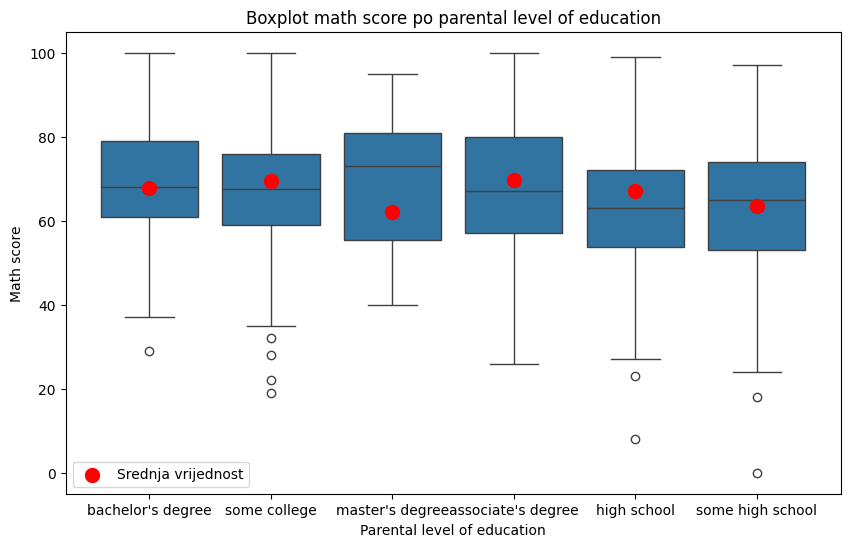

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    x='parental level of education',
    y='math score',
    data=df
)

# Oznaka srednjih vrijednosti
means = df.groupby('parental level of education')['math score'].mean().values
for i, mean in enumerate(means):
    plt.scatter(i, mean, color='red', zorder=10, s=100, label='Srednja vrijednost' if i==0 else "")

plt.title('Boxplot math score po parental level of education')
plt.ylabel('Math score')
plt.xlabel('Parental level of education')
plt.legend()
plt.show()


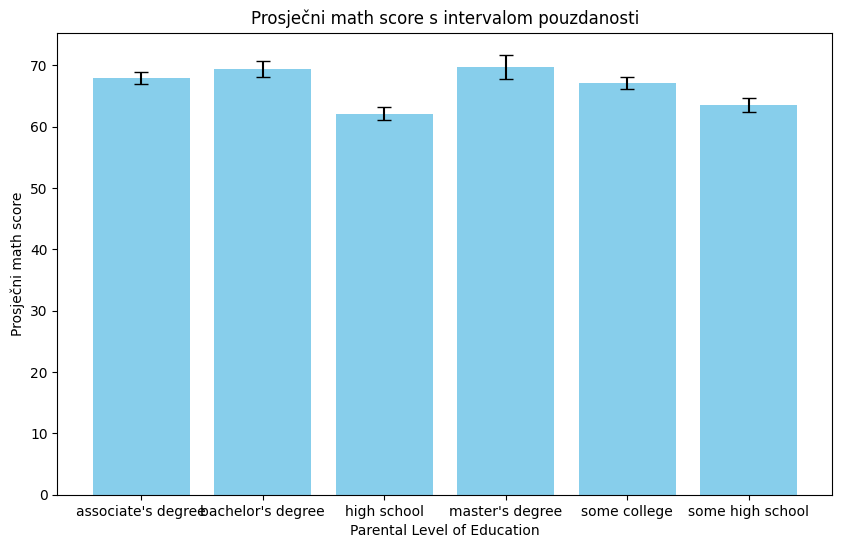

In [41]:
import numpy as np

plt.figure(figsize=(10,6))

means = df.groupby('parental level of education')['math score'].mean()
stds = df.groupby('parental level of education')['math score'].sem()

plt.bar(means.index, means.values, yerr=stds.values, capsize=5, color='skyblue')
plt.ylabel('Prosječni math score')
plt.xlabel('Parental Level of Education')
plt.title('Prosječni math score s intervalom pouzdanosti')
plt.show()



In [43]:
group_means = df.groupby(['gender', 'test preparation course'])['math score'].mean()
print(group_means)


gender  test preparation course
female  completed                  67.195652
        none                       61.670659
male    completed                  72.339080
        none                       66.688312
Name: math score, dtype: float64


Deskriptivna statistika: izgleda da tečaj pomaže i djevojkama i dečkima
ANOVA tek kasnije pita je li ta razlika dovoljno velika da nije slučajna

In [45]:
import statsmodels.formula.api as smf

model = smf.ols(
    "Q('math score') ~ C(gender) * C(Q('test preparation course'))",
    data=df
).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        Q('math score')   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     20.98
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           3.48e-13
Time:                        22:51:17   Log-Likelihood:                -4106.7
No. Observations:                1000   AIC:                             8221.
Df Residuals:                     996   BIC:                             8241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


#Prob (F-statistic): 3.48e-13 p  0.05 → model je statistički značajan, bar jedan faktor (spol, tečaj ili interakcija) ima utjecaj,
#R-squared: 0.059,Adj. R-squared: 0.057 model objašnjava oko 6% varijance math score-a
#Intercept = 67.1957 Prosječni math score za female koje su završile tečaj(female=referentna grupa),
#C(gender)[T.male] = +5.14 Muški učenici u prosjeku imaju 5.14 bodova više od ženskih p = 0.001 efekt je statistički značajan,
#C(test preparation course)[T.none] = −5.5250 Učenici koji nisu pohađali tečaj imaju 5.53 boda manje od onih koji jesu efekt je značajan,
#C(gender)[T.male]:C(test preparation course)[T.none] Učinak tečaja je sličan za djevojke i dečke(razlika između spolova ne ovisi o tečaju)



In [46]:
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model, typ=2)
print(anova_results)


                                                  sum_sq     df          F  \
C(gender)                                    6399.209637    1.0  29.502577   
C(Q('test preparation course'))              7170.996015    1.0  33.060780   
C(gender):C(Q('test preparation course'))       0.907979    1.0   0.004186   
Residual                                   216035.801152  996.0        NaN   

                                                 PR(>F)  
C(gender)                                  7.018859e-08  
C(Q('test preparation course'))            1.187245e-08  
C(gender):C(Q('test preparation course'))  9.484258e-01  
Residual                                            NaN  


C(gender)
sum_sq = 6399.21
F = 29.50
p = 7.0e-08
Spol značajno utječe na math score
p < 0.05 odbacujemo H₀
Postoji statistički značajna razlika u rezultatima iz matematike između spolova.

C(gender):C(test preparation course)
F = 0.004
p = 0.948
p > 0.05
Učinak pripremnog tečaja ne ovisi o spolu učenika.
Razlika između dječaka i djevojčica je slična bez obzira na tečaj.

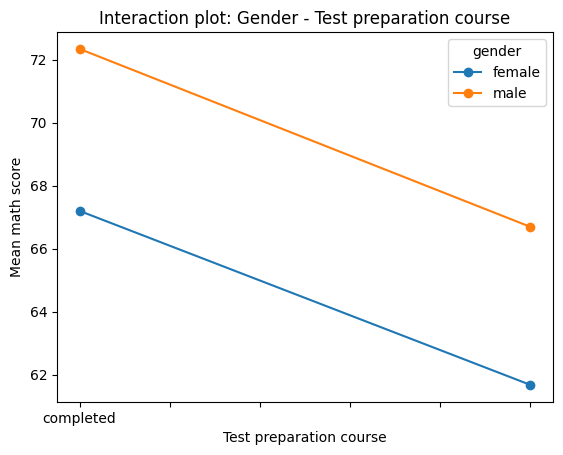

In [47]:
means = df.groupby(['test preparation course', 'gender'])['math score'].mean().unstack()
means.plot(marker='o')
plt.xlabel("Test preparation course")
plt.ylabel("Mean math score")
plt.title("Interaction plot: Gender - Test preparation course")
plt.show()


In [48]:

from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula(
    "Q('math score') + Q('reading score') + Q('writing score') ~ C(gender) * C(Q('test preparation course'))",
    data=df
)

print(manova.mv_test())

                           Multivariate linear model
                                                                                
-----------------------------------------------------------------------------------
            Intercept           Value     Num DF     Den DF      F Value     Pr > F
-----------------------------------------------------------------------------------
               Wilks' lambda    0.1282    3.0000    994.0000    2253.3361    0.0000
              Pillai's trace    0.8718    3.0000    994.0000    2253.3361    0.0000
      Hotelling-Lawley trace    6.8008    3.0000    994.0000    2253.3361    0.0000
         Roy's greatest root    6.8008    3.0000    994.0000    2253.3361    0.0000
--------------------------------------------------------------------------------
                                                                                
-----------------------------------------------------------------------------------
             C(gender)          

3 zavisne varijable: math score, reading score, writing score, 2 faktora: gender, test preparation course

C(gender)
Wilks' lambda = 0.6531
F = 176.02
p < 0.001
p < 0.05 -> značajno
Spol utječe na kombinaciju: math, reading, writing

gender × test preparation nema interakcije p>0.05 učinak pripremnog tečaja na rezultate učenika ne ovisi o spolu

Rezultati MANOVA analize pokazuju da spol učenika (Wilks’ λ = 0.653, F = 176.02, p < 0.001) i pohađanje pripremnog tečaja (Wilks’ λ = 0.885, F = 43.26, p < 0.001) imaju statistički značajan utjecaj na ukupni akademski uspjeh učenika, promatran kroz rezultate iz matematike, čitanja i pisanja. Interakcijski efekt između spola i pohađanja pripremnog tečaja nije statistički značajan (Wilks’ λ = 0.9997, p = 0.9535), što upućuje na to da se učinak pripremnog tečaja ne razlikuje ovisno o spolu učenika.

In [49]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

for dv in ['math score', 'reading score', 'writing score']:
    model_uv = smf.ols(
        f"Q('{dv}') ~ C(gender) * C(Q('test preparation course'))",
        data=df
    ).fit()

    print(f"\nUnivarijatna ANOVA za: {dv}")
    print(anova_lm(model_uv, typ=2))



Univarijatna ANOVA za: math score
                                                  sum_sq     df          F  \
C(gender)                                    6399.209637    1.0  29.502577   
C(Q('test preparation course'))              7170.996015    1.0  33.060780   
C(gender):C(Q('test preparation course'))       0.907979    1.0   0.004186   
Residual                                   216035.801152  996.0        NaN   

                                                 PR(>F)  
C(gender)                                  7.018859e-08  
C(Q('test preparation course'))            1.187245e-08  
C(gender):C(Q('test preparation course'))  9.484258e-01  
Residual                                            NaN  

Univarijatna ANOVA za: reading score
                                                  sum_sq     df          F  \
C(gender)                                   12863.415867    1.0  68.279387   
C(Q('test preparation course'))             12601.298604    1.0  66.888061   
C(gender):C(

C(gender) -> p < 0.05 → spol značajno utječe na math score

C(test preparation course) → p < 0.05 → tečaj značajno utječe

Interakcija -> p > 0.05 → učinak spola ne ovisi o tečaju, nema interakcije